## 캐나다(CAvideos)와 독일(DEvideos)의 자료 이용

In [17]:
import pandas as pd
import numpy as np

CA=pd.read_csv('C:/Users/LG/Desktop/ESAA/Data/youtube-new/CAvideos.csv')
DE=pd.read_csv('C:/Users/LG/Desktop/ESAA/Data/youtube-new/DEvideos.csv')

In [18]:
CA_DE=pd.concat([CA,DE])

In [6]:
print(CA_DE)

          video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
5      0yIWz1XEeyc      17.14.11   
6      _uM5kFfkhB8      17.14.11   
7      2kyS6SvSYSE      17.14.11   
8      JzCsM1vtn78      17.14.11   
9      43sm-QwLcx4      17.14.11   
10     H1KBHFXm2Bg      17.14.11   
11     U3xLOo-CNwo      17.14.11   
12     FyZMnhUtLfE      17.14.11   
13     7MxiQ4v0EnE      17.14.11   
14     LUzsOyWp9lw      17.14.11   
15     AS9-ITLhQxo      17.14.11   
16     gifPYwArCVQ      17.14.11   
17     8NHA23f7LvU      17.14.11   
18     fy-CuCzaPp8      17.14.11   
19     kzwfHumJyYc      17.14.11   
20     nc99ccSXST0      17.14.11   
21     puqaWrEC7tY      17.14.11   
22     6H3wVsceoS0      17.14.11   
23     PRlmRnU9qts      17.14.11   
24     ZhhXLMbZ1rQ      17.14.11   
25     wuf2KinLxZ8      17.14.11   
26     aVTAU_4i9AY      17.1

In [2]:
print(CA.shape)
print(DE.shape)

(40881, 16)
(40840, 16)


In [8]:
print(CA_DE.shape)

(81721, 16)


In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## 1. 캐나다의 영상 조회수(views)와 좋아요수(likes) 산점도 그리기 

C:\Users\LG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Likes')

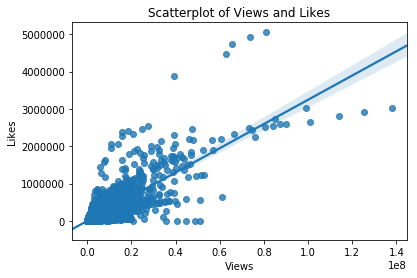

In [3]:
ax=plt.subplots()
ax=sns.regplot(x='views',y='likes',data=CA)
ax.set_title('Scatterplot of Views and Likes')
ax.set_xlabel('Views')
ax.set_ylabel('Likes')

- 조회수와 좋아요수가 하위인 그룹의 산점도가 그래프 상에서 봤을 때 뭉쳐져 있기 때문에 따로 뽑아서 자세하게 확인해본다.

### view 하위 100개 데이터 프레임으로 만들기

In [18]:
a_CA=CA.loc[:,['video_id','views','likes']]
CA_views=a_CA.sort_values(by=['views'],ascending=True)
CA_likes=a_CA.sort_values(by=['likes'],ascending=True)

b_CA=pd.DataFrame(CA_views.head(100)) 

In [24]:
print(b_CA.head(10))

          video_id  views  likes
34625  bz91MAdY6FQ    733     10
18045  _QPStIydtgg   1000     46
18076  CGv_PLrWArs   1023     65
20505  MTtFpn9C7Q4   1107     14
579    0ayARJdf7I4   1141      0
584    nqR7jkb3ehM   1187      0
8953   xuLevcMO3BI   1295     69
16895  q-_6-i2kNoE   1369     52
19139  0c8C0p1WS7k   1392     25
17338  5QOS8rzVlDI   1443     19


C:\Users\LG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Likes')

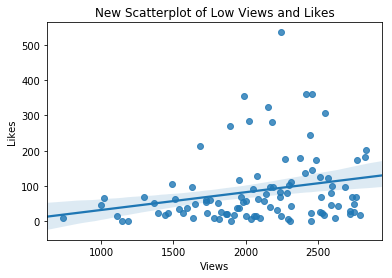

In [19]:
ax=plt.subplots()
ax=sns.regplot(x='views',y='likes',data=b_CA)
ax.set_title('New Scatterplot of Low Views and Likes')
ax.set_xlabel('Views')
ax.set_ylabel('Likes')

- 조회수가 하위 100개인 영상들의 조회수와 좋아요 수는 매우 약한 상관관계를 보인다. 

## 2. 캐나다와 독일을 합친 자료의 카테고리 아이디(category_id)별 영상수, 좋아요수(likes) 관계 살펴보기

### (1) 카테고리 아이디(category_id)별 영상수 막대그래프 그리기

In [20]:
CA_DE=pd.concat([CA,DE])

Text(0,0.5,'Number of Videos')

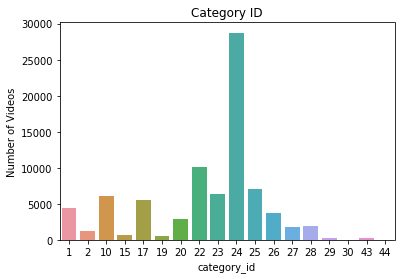

In [21]:
ax=plt.subplots()
ax=sns.countplot('category_id',data=CA_DE)
ax.set_title('Category ID')
ax.set_ylabel('Number of Videos')

- category id가 24인 entertainment에 해당하는 영상이 가장 많다.

### (2) 카테고리 아이디(category_id)별 좋아요수(likes)의 평균 그래프 (이변량 막대그래프)

C:\Users\LG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Likes')

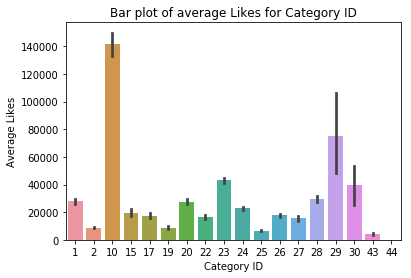

In [22]:
ax=plt.subplots()
ax=sns.barplot(x='category_id',y='likes',data=CA_DE)
ax.set_title('Bar plot of average Likes for Category ID')
ax.set_xlabel('Category ID')
ax.set_ylabel('Average Likes')

- category id가 24인 Entertainment에 해당하는 영상이 가장 많았지만, 좋아요수의 평균이 가장 높은 category id는 10으로 music이다. 

### (3) 영상수가 가장 많은 category id 24(entertainment)와 좋아요수가 가장 높은 10(music)만 뽑아서 댓글 수(comment_count) 살펴보기 

In [25]:
new_CA_DE=CA_DE[CA_DE['category_id'].isin(['10','24'])] 
new_category_id_10_24=new_CA_DE.loc[:,['category_id','comment_count']]
print(new_category_id_10_24.head(10))

    category_id  comment_count
0            10         125882
3            24          17518
4            10          85067
8            24          36391
10           10          28976
13           10           8063
14           24           5335
17           24            605
21           24           2146
24           24           3579


C:\Users\LG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'average comment counts')

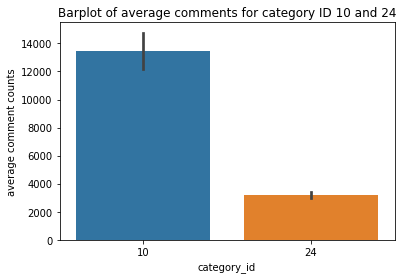

In [26]:
ax=plt.subplots()
ax=sns.barplot(x='category_id',y='comment_count',data=new_category_id_10_24)
ax.set_title('Barplot of average comments for category ID 10 and 24')
ax.set_ylabel('average comment counts')

- category id가 10인 music의 평균 댓글수가 24(entertaimnemt)보다 많았다.
- 즉 카테고리 해당 영상 수는 entertainment가 가장 높았지만, 좋아요수가 높았던 10(music)에서 댓글 수가 많다는 것을 알 수 있다.

## 3. 영상수가 많은 날들을 추출해서 비교해보기

### (1) 날짜를 뽑아내기 위해서 publish_time 변수에서 year, month, day 분리

In [49]:
def Convert(string): 
    li = list(string.split("-")) 
    return li 

CA_publish_time = pd.DataFrame(CA['publish_time'])
CA_publish_month=[]
CA_publish_year=[]
CA_publish_rest=[]
CA_publish_day=[]

for i in range(len(CA)):
    time = CA_publish_time.loc[i,'publish_time']
    time_list = Convert(time)
    CA_publish_year.append(time_list[0])
    CA_publish_month.append(time_list[1])
    CA_publish_rest.append(time_list[2])
    CA_publish_day.append(CA_publish_rest[i][0:2])

CA_publish_year_df=pd.DataFrame(CA_publish_year, columns=['year'])
CA_publish_month_df=pd.DataFrame(CA_publish_month, columns=['month'])
CA_publish_day_df=pd.DataFrame(CA_publish_day, columns=['day'])

CA_final = pd.concat([CA, CA_publish_year_df, CA_publish_month_df, CA_publish_day_df], axis=1)
CA_final.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,10
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,2017,11,13
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,12
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,12
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,11,09


In [52]:
CA_year_count=CA_final.groupby("year").count()
CA_year_count.sort_values(ascending = False, by="category_id")

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,month,day
year,,,,,,,,,,,,,,,,,,
2018,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,29930,30936,30936
2017,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9615,9900,9900
2016,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,10,13,13
2013,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,7,7
2014,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,6,6
2008,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2010,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2009,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


- 2017년과 2018년의 자료가 거의 대부분이기 때문에 2017, 2018년의 자료만 살펴보겠다.

### (2-1) 2017년 자료만 추출하기

In [71]:
CA_final_2017 = CA_final.loc[CA_final['year'] == '2017', : ]
CA_final_2017

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,10
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,2017,11,13
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,12
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,12
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,11,09
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,2017,11,13
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,2017,11,12
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,13
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,2017,11,12
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,2017,11,10


### (2-2) 2018년 자료만 추출하기

In [70]:
CA_final_2018 = CA_final.loc[CA_final['year'] == '2018', : ]
CA_final_2018

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
9616,21EJMIdK1_g,18.01.01,London Fireworks 2018 LIVE - New Year's Eve Fi...,BBC,24,2018-01-01T00:21:00.000Z,"BBC|""fireworks""|""NYE""|""new year""|""countdown""|""...",475127,8079,224,785,https://i.ytimg.com/vi/21EJMIdK1_g/default.jpg,False,False,False,Programme website: http://bbc.in/2BsMv4k Count...,2018,01,01
9619,WuV_KvK9Tqk,18.01.01,New Year 2018: celebrations around the world,The Telegraph,25,2018-01-01T00:54:56.000Z,"Telegraph|""News""|""World News""|""UK Newspaper""|""...",65997,522,20,37,https://i.ytimg.com/vi/WuV_KvK9Tqk/default.jpg,False,False,False,The world welcomes the start of a new year as ...,2018,01,01
9643,KtwVjaO8CwM,18.01.01,London New Year's Eve 2018 - Fireworks From Lo...,BrioTV,17,2018-01-01T00:38:41.000Z,[none],84662,653,41,83,https://i.ytimg.com/vi/KtwVjaO8CwM/default.jpg,False,False,False,LONDON welcomes in 2018 with stunning FIREWORK...,2018,01,01
9653,HsscqYIznPo,18.01.01,Why I'm Deleting SkyDoesMinecraft (Midnight HST),Sky Did Minecraft,24,2018-01-01T02:46:58.000Z,"Gaming|""Minecraft""|""SkyDoesMinecraft""|""Quittin...",193053,21294,2596,58011,https://i.ytimg.com/vi/HsscqYIznPo/default.jpg,False,False,False,"I put the wrong time in the video, midnight HS...",2018,01,01
9659,w9wFRvhme5c,18.01.01,Atlantic Stream - Canada's New Years Eve: Coun...,CBC,24,2018-01-01T04:09:46.000Z,"New Years eve|""New Years eve 2018""|""New Years ...",33637,116,14,10,https://i.ytimg.com/vi/w9wFRvhme5c/default.jpg,False,False,False,"As Canada counts down to 2018, CBC brings Cana...",2018,01,01
9709,PGnsiru6GiE,18.01.01,Pasteur Grégory Toussaint | 12 Nuits d'Adorati...,Tele Shekinah,29,2018-01-01T07:35:22.000Z,"I know who I am|""Patience""|""Love""|""Heaven""|""bl...",26096,788,29,4,https://i.ytimg.com/vi/PGnsiru6GiE/default.jpg,False,False,False,OFFERINGS: https://goo.gl/Lzx53V\n\nTRANSLATIO...,2018,01,01
9723,VsWDf3PVI5s,18.01.01,Crime Patrol Dial 100 - Ep 680 - Full Episode ...,SET India,24,2018-01-01T00:37:07.000Z,"true events|""sony entertainment channel""|""cons...",45392,320,49,74,https://i.ytimg.com/vi/VsWDf3PVI5s/default.jpg,False,False,False,Click here to subscribe to SonyLIV : http://w...,2018,01,01
9730,ARciMyIK1Ng,18.01.01,"BIG! ROGER STONE, MICHAEL CAPUTO, KELLY LEAVIN...",INFO WARS NEWS,24,2018-01-01T00:12:17.000Z,"alex|""jones""|""show""|""infowars""|""live""|""infowar...",21945,1005,27,233,https://i.ytimg.com/vi/ARciMyIK1Ng/default.jpg,False,False,False,SUBSCRIBE & TWITTER - ALEX JONES INFOWARS\nBIT...,2018,01,01
9745,3A5-wv-_QbM,18.01.01,RCCG 2017 CROSSOVER SERVICE,DOVE TELEVISION,29,2018-01-01T00:34:23.000Z,"Pastor E.A Adeboye|""Daddy G.O""|""2017 Crossover...",27097,422,27,1,https://i.ytimg.com/vi/3A5-wv-_QbM/default.jpg,False,False,False,Join Pastor E.A Adeboye for the 2017 CrossOver...,2018,01,01
9761,NSyyTLGyBUY,18.01.01,School District Requires Teachers to Snitch ft...,JustKiddingNews,25,2018-01-01T02:30:01.000Z,"snitch|""go too far""|""district""|""school""|""requi...",35846,1910,27,329,https://i.ytimg.com/vi/NSyyTLGyBUY/default.jpg,False,False,False,A school district is requiring its teachers to...,2018,01,01


### (3-1) 2017년 영상수 막대그래프 그리기

Text(0,0.5,'Number of Videos')

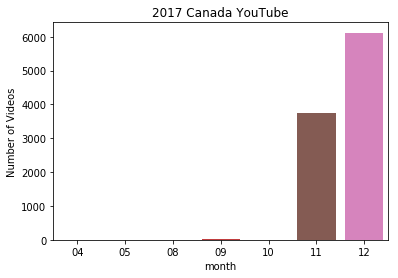

In [69]:
ax=plt.subplots()
ax=sns.countplot('month',data=CA_final_2017)
ax.set_title('2017 Canada YouTube')
ax.set_ylabel('Number of Videos')

### (3-2) 2018년 영상수 막대그래프 그리기

Text(0,0.5,'Number of Videos')

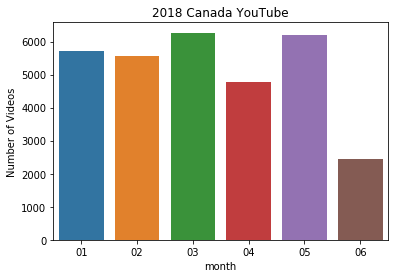

In [59]:
ax=plt.subplots()
ax=sns.countplot('month',data=CA_final_2018)
ax.set_title('2018 Canada YouTube')
ax.set_ylabel('Number of Videos')

- 2018년 6월 13일까지의 자료가 있는 데이터라 2018년 6월의 영상수는 적었다.
- 2017년 12월, 2018년 3월, 5월의 영상수에 대해서 더 살펴보겠다.

### (4) 영상이 많이 업로드 된 날들 살펴보기

In [80]:
CA_final_2018_03 = CA_final_2018.loc[CA_final_2018['month'] == '03', : ]
CA_final_2018_03

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
20940,RKpjH-O8a6w,18.01.03,"Trump Discusses Guns; Hicks, Kushner and Carso...",Late Night with Seth Meyers,23,2018-03-01T02:13:11.000Z,"late night|""seth meyers""|""closer look""|""trump""...",597705,11638,291,1441,https://i.ytimg.com/vi/RKpjH-O8a6w/default.jpg,False,False,False,Seth takes a closer look at the high-level Tru...,2018,03,01
20949,_0Wz8e4W-oE,18.01.03,Patience,Domics,23,2018-03-01T01:27:46.000Z,"domics|""animation""|""patience""|""crunchyroll""|""c...",803075,72857,370,7871,https://i.ytimg.com/vi/_0Wz8e4W-oE/default.jpg,False,False,False,Get CrunchyRoll Premium Ad Free for 14 Days: h...,2018,03,01
20959,Qj7BXPl2Jik,18.01.03,Logan Paul ON PROBATION! #DramaAlert RiceGum V...,DramaAlert,25,2018-03-01T02:21:44.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",905934,47439,3206,4803,https://i.ytimg.com/vi/Qj7BXPl2Jik/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,2018,03,01
20970,YNhMPl6blT0,18.01.03,"The Daily Show With Trevor Noah - February 28,...",TheWorldwiteweb,22,2018-03-01T04:26:16.000Z,"The Daily Show With Trevor Noah 2/28/18|""The D...",118956,1132,76,169,https://i.ytimg.com/vi/YNhMPl6blT0/default.jpg,False,False,False,The Daily Show With Trevor Noah 2/28/18 | Ben ...,2018,03,01
20973,oOnV8LiFEPs,18.01.03,Hope Hicks Resigns ONE DAY After Testifying Ab...,The Young Turks,25,2018-03-01T00:56:04.000Z,"180228__TA01Resignation|""TYT""|""The Young Turks...",101782,3011,87,1169,https://i.ytimg.com/vi/oOnV8LiFEPs/default.jpg,False,False,False,This looks suspicious. Cenk Uygur and John Iad...,2018,03,01
20980,bM8Dg5U3he0,18.01.03,"Stephen Colbert - Feb 28, 2017 | Trump Fires F...",Donald J. Trump Topic,22,2018-03-01T05:15:06.000Z,[none],20726,308,13,50,https://i.ytimg.com/vi/bM8Dg5U3he0/default.jpg,False,False,False,"Channel Speakers: Donald Trump, Stephen Colber...",2018,03,01
20987,W76cXdfboOk,18.01.03,Ken Rex - Q+A,BuzzFeedBlue,22,2018-03-01T01:00:43.000Z,"Buzzfeed unsolved|""BuzzFeed""|""unsolved""|""myste...",258636,12663,79,1070,https://i.ytimg.com/vi/W76cXdfboOk/default.jpg,False,False,False,Does Shane only answer goofy questions?\nGet 1...,2018,03,01
20996,ZiaTw2Z16YA,18.01.03,"The National for February 28, 2018 - Gun Contr...",The National,25,2018-03-01T03:05:12.000Z,"CBC|""NEWS""|""CBC NEWS""|""THE NATIONAL""|""CANADA""|...",7696,64,20,0,https://i.ytimg.com/vi/ZiaTw2Z16YA/default.jpg,True,False,False,"Welcome to The National, the flagship nightly ...",2018,03,01
21003,uWNUD-NpxoM,18.01.03,An Outraged Scheer VS Talking Point Trudeau,Steeper33,25,2018-03-01T02:15:04.000Z,"Trudeau|""Scheer""|""Liberal""|""Ethics""|""Canada""|""...",9780,444,1,263,https://i.ytimg.com/vi/uWNUD-NpxoM/default.jpg,False,False,False,Conservative Leader Andrew Scheer demands answ...,2018,03,01
21009,43VxQEuKqww,18.01.03,Fairly OddParents CANCELLED?! | Butch Hartman’...,Butch Hartman,1,2018-03-01T03:03:42.000Z,"fairly oddparents|""why i left nickelodeon""|""ni...",144813,12827,146,1671,https://i.ytimg.com/vi/43VxQEuKqww/default.jpg,False,False,False,The Fairly OddParents was CANCELLED... 5 times...,2018,03,01


Text(0,0.5,'Number of Videos')

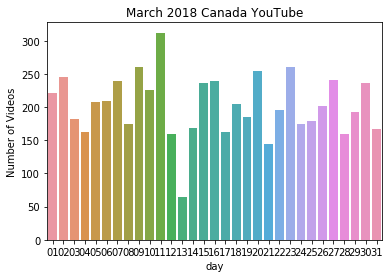

In [82]:
ax=plt.subplots()
ax=sns.countplot('day',data=CA_final_2018_03)
ax.set_title('March 2018 Canada YouTube')
ax.set_ylabel('Number of Videos')

In [86]:
CA_final_2018_03_11 = CA_final_2018_03.loc[CA_final_2018_03['day'] == '11', : ]
CA_final_2018_03_11

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day
22963,ILm-b0Gw7-E,18.11.03,Enima - In Love,Enima Officiel,10,2018-03-11T01:00:00.000Z,"rap|""québec""|""montréal""|""canada""|""france""|""hip...",23616,1834,85,249,https://i.ytimg.com/vi/ILm-b0Gw7-E/default.jpg,False,False,False,Album « OPN » bientôt disponible sur toutes le...,2018,03,11
22974,C8NC80CGnbA,18.11.03,Gmod Hide and Seek Funny Moments - St. Patrick...,VanossGaming,20,2018-03-11T02:49:37.000Z,"Vanoss|""H20 Delirious""|""BasicallyIdowrk""|""LEGI...",893361,40307,373,3522,https://i.ytimg.com/vi/C8NC80CGnbA/default.jpg,False,False,False,Vanoss merch HERE!: https://vanoss.3blackdot.c...,2018,03,11
22988,sdg4l0xHTE4,18.11.03,*GOING INSIDE* SECRET ICE CAVE DOOR in JAILBRE...,LandonRB - ROBLOX,20,2018-03-11T01:19:22.000Z,"Roblox|""LandonRB""|""Roblox Landon""|""Landon Robl...",77735,4904,206,2375,https://i.ytimg.com/vi/sdg4l0xHTE4/default.jpg,False,False,False,*GOING INSIDE* SECRET ICE CAVE DOOR in JAILBRE...,2018,03,11
23009,YTWx42YMkbA,18.11.03,WATCH: President Donald Trump EXPLOSIVE Rally ...,Right Side Broadcasting Network,25,2018-03-11T04:49:30.000Z,"Donald Trump|""President Trump""|""Live Stream""|""...",146437,5009,133,80,https://i.ytimg.com/vi/YTWx42YMkbA/default.jpg,False,False,False,"Saturday, March 10, 2018: RSBN's Steve Lookner...",2018,03,11
23021,NVW8mOchOZw,18.11.03,Fortnite Battle Royale GRIND Stream! - Solo Wi...,Pack A Puncher,20,2018-03-11T00:49:07.000Z,"fortnite|""fortnite battle royale""|""fortnite li...",180665,4535,296,12,https://i.ytimg.com/vi/NVW8mOchOZw/default_liv...,False,False,False,DONATE & BE ON STREAM: https://youtube.streaml...,2018,03,11
23025,NMOVMtb0Ih0,18.11.03,I CANT BE STOPPED!! - Uno Gameplay Funny Moments,Mini Ladd,20,2018-03-11T01:34:34.000Z,"Mini Ladd|""MiniLadd""|""Uno Gameplay""|""Uno Full ...",292252,12759,103,762,https://i.ytimg.com/vi/NMOVMtb0Ih0/default.jpg,False,False,False,NEW MERCH: https://shop.miniladdmerch.com/\n\n...,2018,03,11
23069,fkYxcnJz-Lg,18.11.03,DEROZAN IS UNSTOPPABLE! RAPTORS vs PISTONS & R...,Oprah Sideverson,24,2018-03-11T00:12:29.000Z,"rockets vs raptors|""raptors vs rockets""|""rapto...",80052,4770,63,679,https://i.ytimg.com/vi/fkYxcnJz-Lg/default.jpg,False,False,False,My reaction to THE RAPTORS PLAYING THE PISTONS...,2018,03,11
23085,-SC8Vt8vrh0,18.11.03,"FORTNITE NEW UPDATE!! // 10,900+ KILLS // 592+...",Typical Gamer,20,2018-03-11T00:20:02.000Z,"fortnite|""typical gamer""|""tg""|""fortnite live""|...",242628,8225,224,362,https://i.ytimg.com/vi/-SC8Vt8vrh0/default.jpg,False,False,False,New Fortnite update live with Typical Gamer!\n...,2018,03,11
23116,A0FZIwabctw,18.11.03,Falcon Heavy & Starman,SpaceX,28,2018-03-11T01:30:44.000Z,[none],512769,51696,376,3358,https://i.ytimg.com/vi/A0FZIwabctw/default.jpg,False,False,False,"When Falcon Heavy lifted off, it became the mo...",2018,03,11
23120,aZ2ab7RtuDU,18.11.03,Trump delivers remarks at campaign rally for R...,NBC News,25,2018-03-11T01:33:36.000Z,"nbc news|""breaking news""|""us news""|""world news...",41070,731,260,0,https://i.ytimg.com/vi/aZ2ab7RtuDU/default.jpg,True,False,False,President Trump speaks at a rally in Moon Town...,2018,03,11


Text(0,0.5,'Number of Videos')

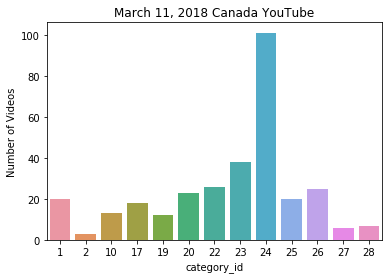

In [87]:
ax=plt.subplots()
ax=sns.countplot('category_id',data=CA_final_2018_03_11)
ax.set_title('March 11, 2018 Canada YouTube')
ax.set_ylabel('Number of Videos')

Text(0,0.5,'Number of Videos')

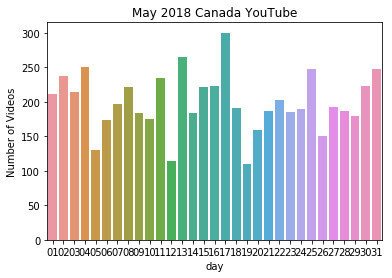

In [88]:
CA_final_2018_05 = CA_final_2018.loc[CA_final_2018['month'] == '05', : ]
ax=plt.subplots()
ax=sns.countplot('day',data=CA_final_2018_05)
ax.set_title('May 2018 Canada YouTube')
ax.set_ylabel('Number of Videos')

Text(0,0.5,'Number of Videos')

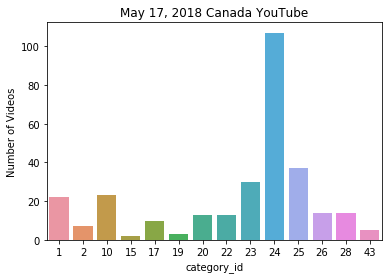

In [89]:
CA_final_2018_05_17 = CA_final_2018_05.loc[CA_final_2018_05['day'] == '17', : ]
ax=plt.subplots()
ax=sns.countplot('category_id',data=CA_final_2018_05_17)
ax.set_title('May 17, 2018 Canada YouTube')
ax.set_ylabel('Number of Videos')

Text(0,0.5,'Number of Videos')

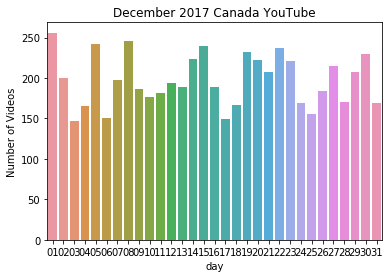

In [90]:
CA_final_2017_12 = CA_final_2017.loc[CA_final_2017['month'] == '12', : ]
ax=plt.subplots()
ax=sns.countplot('day',data=CA_final_2017_12)
ax.set_title('December 2017 Canada YouTube')
ax.set_ylabel('Number of Videos')

Text(0,0.5,'Number of Videos')

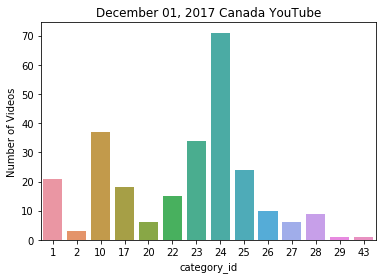

In [91]:
CA_final_2017_12_01 = CA_final_2017_12.loc[CA_final_2017_12['day'] == '01', : ]
ax=plt.subplots()
ax=sns.countplot('category_id',data=CA_final_2017_12_01)
ax.set_title('December 01, 2017 Canada YouTube')
ax.set_ylabel('Number of Videos')

- 매일 업로드 된 영상수를 비교하는 것은 큰 의미가 없을 것 같아서 각 달에 영상수를 많이 올린 날을 뽑아서 카테고리 아이디를 본 결과, 24번인 'Entertaimnet'가 가장 많았다.
- 하지만 이 결과도 크게 의미가 없는 것 같아서 영상수가 많이 업로드 된 2018년 3월 자료를 보고 'Entertainment' 영상을 하루 평균 몇 건 정도 업로드 하는지 살펴보았다.

### (5) 하루에 'Entertainment' 영상을 올리는 횟수 막대그래프

Text(0,0.5,'Number of Videos')

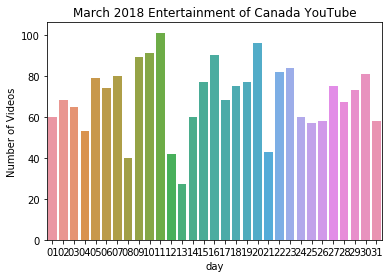

In [110]:
CA_final_2018_03_id24 = CA_final_2018_03.loc[CA_final_2018_03['category_id'] == 24, :]
ax=plt.subplots()
ax=sns.countplot('day',data=CA_final_2018_03_id24)
ax.set_title('March 2018 Entertainment of Canada YouTube')
ax.set_ylabel('Number of Videos')

Text(0,0.5,'Number of Videos')

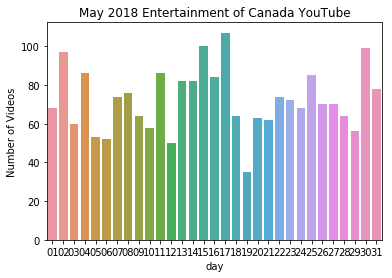

In [111]:
CA_final_2018_05_id24 = CA_final_2018_05.loc[CA_final_2018_05['category_id'] == 24, :]
ax=plt.subplots()
ax=sns.countplot('day',data=CA_final_2018_05_id24)
ax.set_title('May 2018 Entertainment of Canada YouTube')
ax.set_ylabel('Number of Videos')

Text(0,0.5,'Number of Videos')

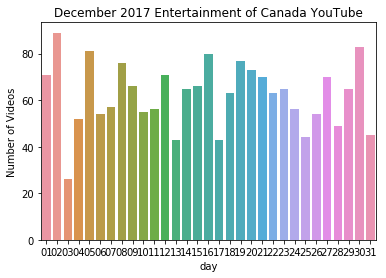

In [112]:
CA_final_2017_12_id24 = CA_final_2017_12.loc[CA_final_2017_12['category_id'] == 24, :]
ax=plt.subplots()
ax=sns.countplot('day',data=CA_final_2017_12_id24)
ax.set_title('December 2017 Entertainment of Canada YouTube')
ax.set_ylabel('Number of Videos')

- 영상을 가장 많이 업로드한 세 달을 살펴보니 "Entertainment" 영상을 하루에 많게는 100건 이상을 올리고 적게는 약 20건 정도 올리는 것으로 보인다.

## 4-1. DE Likes, Dislikes, Comment Counts 그래프 

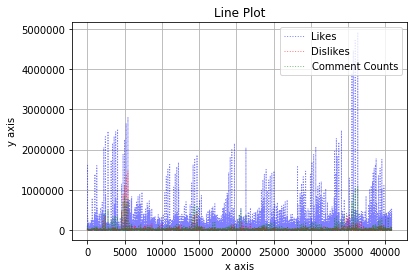

In [136]:
DE.likes.plot(kind = 'line', color = 'b',label = 'Likes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
DE.dislikes.plot(kind = 'line', color = 'r',label = 'Dislikes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
DE.comment_count.plot(color = 'g',label = 'Comment Counts',linewidth=1, alpha = 0.5,grid = True,linestyle = ':')
plt.legend(loc='upper right')   
plt.xlabel('x axis')           
plt.ylabel('y axis')
plt.title('Line Plot')        
plt.show()

## 4-2. DE Likes, Comment Counts 상관관계

Text(0.5,1,'Likes and Comment Counts Scatter Plot')

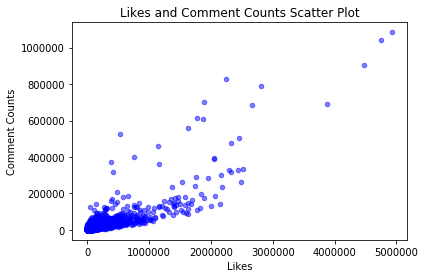

In [138]:
DE.plot(kind='scatter', x='likes', y='comment_count',alpha = 0.5,color = 'blue')
plt.xlabel('Likes')              
plt.ylabel('Comment Counts')
plt.title('Likes and Comment Counts Scatter Plot')            

- X(좋아요수), Y(댓글수) 두 변수간에 션형관계가 존재함을 파악할 수 있다.

## 4-3. DE Dislikes, Comment Counts 상관관계

Text(0.5,1,'Dislikes and Comment Counts Scatter Plot')

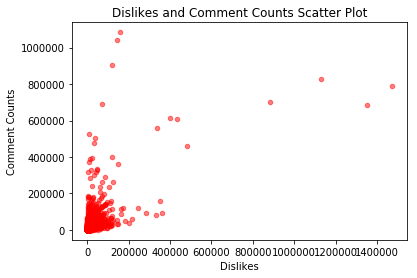

In [140]:
DE.plot(kind='scatter', x='dislikes', y='comment_count',alpha = 0.5,color = 'red')
plt.xlabel('Dislikes')             
plt.ylabel('Comment Counts')
plt.title('Dislikes and Comment Counts Scatter Plot')           

## 5-1. CA Likes, Dislikes, Comment Counts 그래프

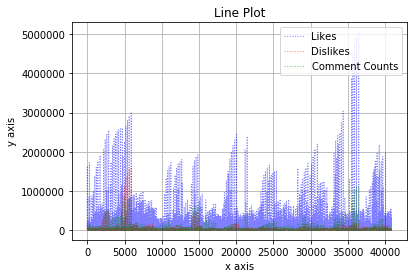

In [141]:
CA.likes.plot(kind = 'line', color = 'b',label = 'Likes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
CA.dislikes.plot(kind = 'line', color = 'r',label = 'Dislikes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
CA.comment_count.plot(color = 'g',label = 'Comment Counts',linewidth=1, alpha = 0.5,grid = True,linestyle = ':')
plt.legend(loc='upper right')   
plt.xlabel('x axis')           
plt.ylabel('y axis')
plt.title('Line Plot')        
plt.show()

## 5-2. CA Likes, Comment Counts 상관관계

Text(0.5,1,'Likes and Comment Counts Scatter Plot')

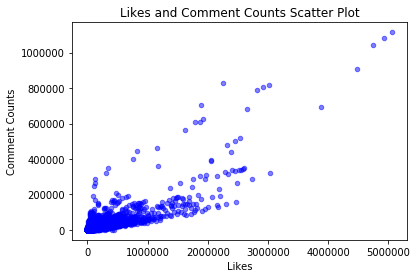

In [143]:
CA.plot(kind='scatter', x='likes', y='comment_count',alpha = 0.5,color = 'blue')
plt.xlabel('Likes')              
plt.ylabel('Comment Counts')
plt.title('Likes and Comment Counts Scatter Plot') 

- X(좋아요수), Y(댓글수) 두 변수간에 션형관계가 존재함을 파악할 수 있다.

## 5-3. CA Dislikes, Comment Counts 상관관계

Text(0.5,1,'Dislikes and Comment Counts Scatter Plot')

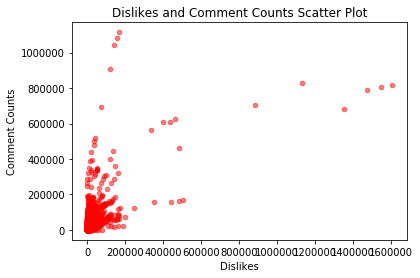

In [145]:
CA.plot(kind='scatter', x='dislikes', y='comment_count',alpha = 0.5,color = 'red')
plt.xlabel('Dislikes')             
plt.ylabel('Comment Counts')
plt.title('Dislikes and Comment Counts Scatter Plot')

- 두 나라 모두 Likes와 Comment Counts간에는 선형관계 있지만 Dislikes와 Comment Counts간에는 선형관계가 없다.

## 6. 캐나다와 독일의 영상수 및 좋아요수(likes), 조회수(views) 관계 비교

### (1) category_id가 실제 어떤 category인지 알 수 있도록 CA, DE 데이터와 category_name 열을 연결

In [146]:
category_id_name={2 : 'Autos & Vehicles',
1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'}

In [148]:
category_id_list = pd.DataFrame(list(category_id_name.items()), columns=['category_id', 'category_name'])
print(category_id_list)

    category_id          category_name
0             2       Autos & Vehicles
1             1       Film & Animation
2            10                  Music
3            15         Pets & Animals
4            17                 Sports
5            18           Short Movies
6            19        Travel & Events
7            20                 Gaming
8            21          Videoblogging
9            22         People & Blogs
10           23                 Comedy
11           24          Entertainment
12           25        News & Politics
13           26          Howto & Style
14           27              Education
15           28   Science & Technology
16           29  Nonprofits & Activism
17           30                 Movies
18           31        Anime/Animation
19           32       Action/Adventure
20           33               Classics
21           34                 Comedy
22           35            Documentary
23           36                  Drama
24           37          

In [150]:
CA_with_category_name = pd.merge(CA,category_id_list)
DE_with_category_name = pd.merge(DE,category_id_list)

print(CA_with_category_name[['category_id','category_name']].head())
print(DE_with_category_name[['category_id','category_name']].head())

   category_id category_name
0           10         Music
1           10         Music
2           10         Music
3           10         Music
4           10         Music
   category_id  category_name
0           24  Entertainment
1           24  Entertainment
2           24  Entertainment
3           24  Entertainment
4           24  Entertainment


### (2-1) 캐나다 카테고리별 영상수

Text(0,0.5,'Frequency')

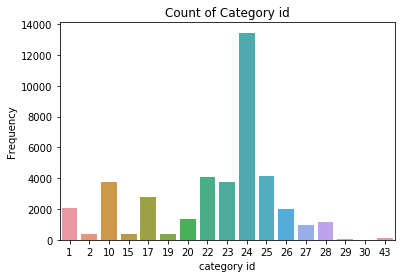

In [151]:
ax = plt.figure() 
ax = sns.countplot('category_id', data=CA) 
ax.set_title('Count of Category id') 
ax.set_xlabel('category id') 
ax.set_ylabel('Frequency') 

### (2-2) 독일 카테고리별 영상수

Text(0,0.5,'Frequency')

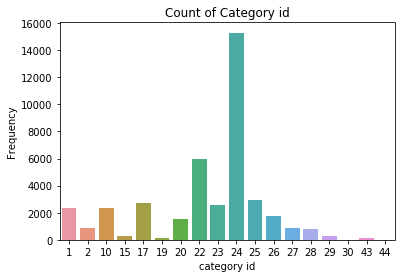

In [152]:
ax = plt.figure() 
ax = sns.countplot('category_id', data=DE) 
ax.set_title('Count of Category id') 
ax.set_xlabel('category id') 
ax.set_ylabel('Frequency') 

- 캐나다와 독일 모두 가장 많은 영상의 category id는 24번(Entertainment)이다.

### (3) 캐나다, 독일의 영상 조회수(views)와 좋아요수(likes) 관계 비교

Text(0,0.5,'likes')

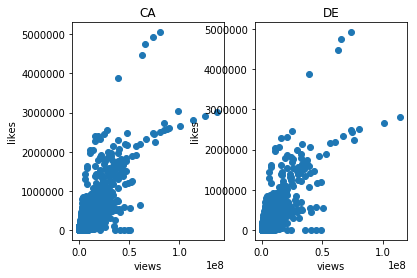

In [153]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 2, 1)
axes2 = scatter_plot.add_subplot(1, 2, 2)


axes1.scatter(CA['views'],CA['likes'])
axes2.scatter(DE['views'],DE['likes'])

axes1.set_title("CA") 
axes2.set_title("DE")
fig.suptitle("likes vs views plot of CA and DE")

axes1.set_xlabel('views') 
axes1.set_ylabel('likes') 
axes2.set_xlabel('views') 
axes2.set_ylabel('likes') 

- 조회수와 좋아요수 사이의 관계(경향성)가 캐나다와 독일에서 비슷한 것을 확인할 수 있다.

### (4-1) category_name, year, month 변수가 들어있는 CA_final2 데이터 생성

In [156]:
CA_final2 = pd.concat([CA_with_category_name, CA_publish_year_df, CA_publish_month_df], axis=1) 
CA_final2

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,2017,11
1,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,2017,11
2,H1KBHFXm2Bg,17.14.11,21 Savage - Bank Account (Official Music Video),21 Savage,10,2017-11-10T19:00:02.000Z,"21 savage|""bank account""|""21 savage bank accou...",5068229,263596,8585,28976,https://i.ytimg.com/vi/H1KBHFXm2Bg/default.jpg,False,False,False,Watch the official music video of Bank Account...,Music,2017,11
3,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,Music,2017,11
4,j67FgNEvyh8,17.14.11,Telefoon || Babbu Maan || Promo || Full Song 1...,Hey Yolo,10,2017-11-12T04:24:34.000Z,"Telefoon|""Babbu Maan""|""Mehfil Mitran Di""|""new ...",178447,4339,96,876,https://i.ytimg.com/vi/j67FgNEvyh8/default.jpg,False,False,False,"Full Song Out Now 15th November\n\nHey Yolo, S...",Music,2017,11
5,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,Music,2017,11
6,Nc0ZCtZdgAk,17.14.11,KOKE (Full Video) | SUNANDA SHARMA | Latest Pu...,Amar Audio,10,2017-11-13T12:43:11.000Z,"Koke|""Koke Sunanda Sharma""|""Latest Punjabi Son...",628340,37121,2100,1667,https://i.ytimg.com/vi/Nc0ZCtZdgAk/default.jpg,False,False,False,Pinky Dhaliwal Presents New Punjabi Song KOKE ...,Music,2017,11
7,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190085,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...",Music,2017,11
8,MbyP-w4uOgk,17.14.11,NAV - Wanted You feat. Lil Uzi Vert (Official ...,NAV,10,2017-11-10T16:59:30.000Z,"nav|""wanted you""|""lil uzi vert""|""nav wanted yo...",1064943,38449,466,2335,https://i.ytimg.com/vi/MbyP-w4uOgk/default.jpg,False,False,False,Listen to the official audio of Wanted You by ...,Music,2017,11
9,66Y44OxufVM,17.14.11,RUM (Regular Use Medicine) By Meet Hundal || D...,Bamb Beats,10,2017-11-12T04:30:01.000Z,"MEET HUNDAL|""ninja""|""amrit maan""|""sharry maan""...",731639,13794,512,376,https://i.ytimg.com/vi/66Y44OxufVM/default.jpg,False,False,False,Song - RUM (REGULAR USE MEDICINE)\nSinger - ME...,Music,2017,11


### (4-2) category_name, year, month 변수가 들어있는 DE_final2 데이터 생성

In [157]:
def Convert(string): 
    li = list(string.split("-")) 
    return li 
    
#DE 데이터에서 연도, 월별로 그룹화하여 데이터를 분석하기 위해
#publish_time 변수에서 year와 month 분리

DE_df = pd.DataFrame(DE['publish_time'])
DE_publish_month=[]
DE_publish_year=[]
for i in range(len(DE)):
    time = DE_df.loc[i,'publish_time']
    time_list = Convert(time)
    DE_publish_year.append(time_list[0])
    DE_publish_month.append(time_list[1])
    
#DE에서 year와 month를 DataFrame으로 변환
DE_publish_year_df=pd.DataFrame(DE_publish_year, columns=['year'])
DE_publish_month_df=pd.DataFrame(DE_publish_month, columns=['month'])

#마찬가지로 DE_final 데이터 생성
DE_final2 = pd.concat([DE_with_category_name, DE_publish_year_df, DE_publish_month_df], axis=1) 
DE_final2

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Entertainment,2017,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017,11
2,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Entertainment,2017,11
3,2hu_evXPpMM,17.14.11,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,24,2017-11-12T16:33:18.000Z,"Dagi Bee|""Heiraten""|""Coldmirror""|""YouTube""|""Tr...",228574,11349,990,1049,https://i.ytimg.com/vi/2hu_evXPpMM/default.jpg,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,Entertainment,2017,11
4,OKYUtHvgMhc,17.14.11,Die Welt in 30 Jahren - Sommer 2047 - VOLKAN,VOLKAN,24,2017-11-12T16:09:44.000Z,"Welt|""Natur""|""Umwelt""|""Klima""|""Klimawandel""",37877,1839,327,170,https://i.ytimg.com/vi/OKYUtHvgMhc/default.jpg,False,False,False,"Über die Zukunft nachzudenken macht Spaß, oder...",Entertainment,2017,11
5,spwqQDCW4TI,17.14.11,RUNDLAUF FUßBALL CHALLENGE + BESTRAFUNG !!,Brotatos,24,2017-11-13T14:03:32.000Z,"fußball challenge|""brotatos""|""fußball""|""footba...",111328,10692,115,548,https://i.ytimg.com/vi/spwqQDCW4TI/default.jpg,False,False,False,Die Rundlauf Fußball Challenge! Jeder kennt da...,Entertainment,2017,11
6,cJx5blgWjDw,17.14.11,Höre NICHT diese Sprachnachricht an.. (WIRKLIC...,Jarow,24,2017-11-11T20:55:29.000Z,jarow,373833,21320,2901,1839,https://i.ytimg.com/vi/cJx5blgWjDw/default.jpg,False,False,False,Hier geht es zum Video von gestern: https://yo...,Entertainment,2017,11
7,lqJbw2pWZLk,17.14.11,Kollegah & Farid Bang ✖️ 180.000€ SHOPPING-TOU...,BangerChannel,24,2017-11-11T16:12:55.000Z,"Gamechanger|""Kollegah""|""Farid Bang""|""JBG""|""JBG...",721888,45981,914,4074,https://i.ytimg.com/vi/lqJbw2pWZLk/default.jpg,False,False,False,✖️►JBG3 [ limitierte STEELBOX ] bei MEDIA MARK...,Entertainment,2017,11
8,hg0OwRhQpGE,17.14.11,10 Unglaubliche Entdeckungen in der Antarktis!,TopWelt,24,2017-11-11T17:00:08.000Z,"topwelt|""top welt""|""unterhaltung""|""fakten""|""wi...",165276,4085,197,292,https://i.ytimg.com/vi/hg0OwRhQpGE/default.jpg,False,False,False,10 unglaubliche Entdeckungen in der Antarktis\...,Entertainment,2017,11
9,xSZnlufFjrA,17.14.11,CAPO - ALLES AUF ROT - TOURBLOG #5,Capo TV,24,2017-11-13T13:50:00.000Z,"capo|""hallo monaco""|""alles auf rot""|""lambo dia...",71120,4138,69,296,https://i.ytimg.com/vi/xSZnlufFjrA/default.jpg,False,False,False,ALLES AUF ROT Tour Tickets:\n► https://www.eve...,Entertainment,2017,11


### (5-1) 연도별 캐나다 유튜브 영상수

In [159]:
CA_year_count2=CA_final2.groupby("year").count()
CA_year_count2.sort_values(ascending = False, by="category_id")

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,month
year,,,,,,,,,,,,,,,,,,
2018,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,30936,29760,30936,30936
2017,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9900,9781,9900,9900
2016,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2013,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,9,9
2015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2014,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2008,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2010,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2009,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


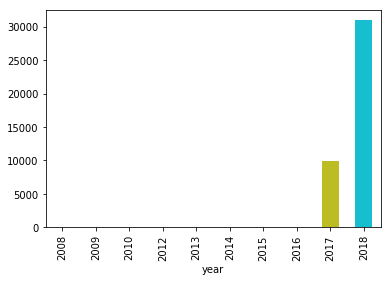

In [160]:
CA_year_count2=pd.DataFrame(CA_final2.groupby("year").count())
df = CA_year_count2['video_id']
df.plot.bar()

- 캐나다에서 trending videos 중 2018년에 업로드 된 영상이 가장 많았고 2012년에 업로드 된 영상이 가장 적었다.

### (5-2) 월별 캐나다 유튜브 영상수

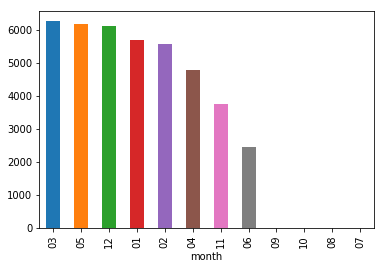

In [161]:
CA_month_count2=pd.DataFrame(CA_final2.groupby("month").count().sort_values(ascending = False, by="category_id"))
df1 = CA_month_count2['video_id']
df1.plot.bar()

- 캐나다의 trending videos 중 3월에 업로드 된 영상이 가장 많다.

### (5-3) 연도별 캐나다 유튜브 평균 조회수

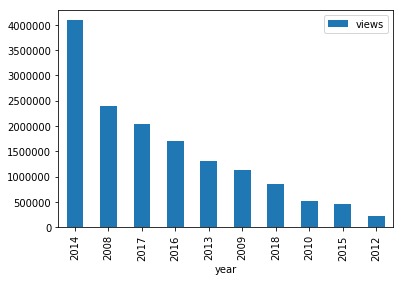

In [162]:
CA_year_views_mean=CA_final2.groupby("year").views.mean()
df2 = pd.DataFrame(CA_year_views_mean.sort_values(ascending=False))
df2.plot.bar()

- 캐나다에서 2014년에 업로드 된 영상의 평균 조회수가 가장 높다

### (5-4) 월별 캐나다 유튜브 평균 조회수

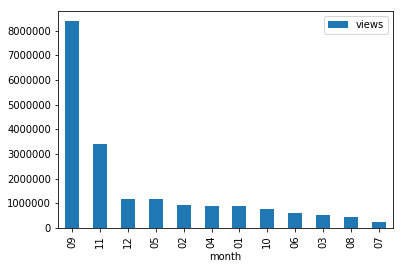

In [168]:
CA_month_views_mean=CA_final2.groupby("month").views.mean()
df3 = pd.DataFrame(CA_month_views_mean.sort_values(ascending=False))
df3.plot.bar()

- 캐나다에서 9월에 업로드 된 영상의 평균 조회수가 가장 높다

### (6-1) 연도별 독일 유튜브 평균 조회수

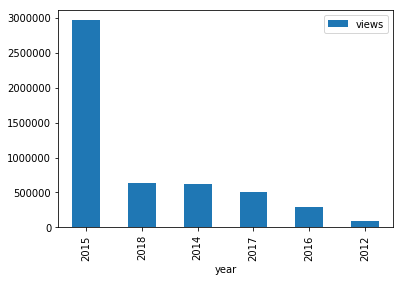

In [169]:
DE_year_views_mean=DE_final2.groupby("year").views.mean()
df4 = pd.DataFrame(DE_year_views_mean.sort_values(ascending=False))
df4.plot.bar()

- 독일에서 2015년에 업로드 된 영상의 평균 조회수가 가장 높다.

### (6-2) 월별 독일 유튜브 평균 조회수

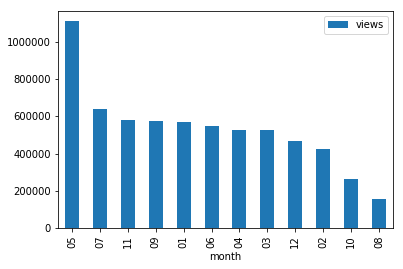

In [167]:
DE_month_views_mean=DE_final2.groupby("month").views.mean()
df5 = pd.DataFrame(DE_month_views_mean.sort_values(ascending=False))
df5.plot.bar()

- 독일에서 5월에 업로드 된 영상의 평균 조회수가 가장 높다.